# SVM Support Vector Machines
### From scratch

Here is a variation of the XOR problem, not linearly separable:

 ![](xor.bmp)

The kernel trick: project on a higher dimension space (in this case 3d)

$ \large x' = x^2 $  
$ \large y' = y^2 $  
$ \large z'  = \sqrt{2} x y $

 ![](3dprojection.bmp)
 

 Now, its possible to find a hyperplane that separates the data
 
 ![](kerneltrick.bmp)

How do we know what space to project the data onto? In general, this is hard to know. SVM does it using Kernels.   
However, what we do know is data is more likely to be linearly separable when projected onto higher dimensions, thanks to Cover’s theorem.

A very surprising aspect of SVMs is that in all of the mathematical machinery it uses, the exact projection, or even the number of dimensions, doesn’t show up.  
You could write all of it in terms of the dot products between various data points (vectors where i is the point and j the dimension number):

$ \large X_i = (x_{i1}, x_{i2} ... x_{ip}) $  
$ \large X_j = (x_{j1}, x_{j2} ... x_{jp}) $  
$ \large X_i . X_j = (x_{i1} x_{j1}, x_{i2} x_{j2} ... x_{ip} x_{jp}) $  


In the previous example, the Kernel function is this:
    
$ \large K = {(X_i . X_j)}^2  = {(x_{i1} x_{j1} + x_{i2} x_{j2})}^2 = {(x_{i1} x_{j1}}^2 + {x_{i2} x_{j2})}^2 + 2 x_{i1} x_{i2} x_{j1} x_{j2} = (x_{i1}^2, x_{i2}^2,
\sqrt{2} x_i1 x_i2) . (x_{j1}^2, x_{j2}^2, \sqrt{2} x_j1 x_j2)$

Hinge loss function: 0 if correctly classified, 1 if its not:
        
$ \large l(x,y,f(x)) = $  
- $ \large 0 \quad \quad \quad \quad \;\; : \; y f(x) \ge 1 $  
- $ \large 1 - y f(x) \; : \; y f(x) < 1 $

## Imports

In [5]:
from utilities.std_imports import *
from matplotlib import style
from numpy.linalg import norm
style.use('ggplot')

## Function definitions

In [1]:
def GetExtremes(data):
    values = np.asarray(list(data.values())).flatten()
    maxVal = max(values)
    minVal = min(values)
    return minVal, maxVal

# Training loop
def Train(data):
    minVal, maxVal = GetExtremes(data)
    steps = [maxVal * 0.1, maxVal * 0.01, maxVal * 0.001,] 

    # b Factors (we dont need to take as small of steps with b as we do w)
    bRangeFactor = 2 
    bFactor = 5
        
    # Support vectors : yi(xi.w+b) = 1
    options = {}
    transforms = [[1,1], [-1,1], [-1,-1], [1,-1]]
    best = maxVal * 10
    for step in steps:
        W = np.array([best,best]) # because its convex
        optimized = False
        while not optimized:
            for b in np.arange(-maxVal * bRangeFactor, maxVal * bRangeFactor, step * bFactor):
                for t in transforms:
                    foundOption = True
                    for yi in data:
                        for xi in data[yi]:
                            if not yi*(np.dot(W*t,xi) + b) >= 1:
                                foundOption = False  #print(xi,':',yi*(np.dot(w_t,xi)+b))
                                    
                    if foundOption: options[norm(W*t)] = [W*t,b]

            if W[0] < 0: optimized = True; print('step optimized')
            else: W = W - step

        norms = sorted([n for n in options])
        opt = options[norms[0]]
        W = opt[0]; b = opt[1] #||w|| : [w,b]
        best = opt[0][0] + step*2
            
    for yi in data:
        for xi in data[yi]:
            print(xi,' : ', yi * (np.dot(W,xi)+b)) 

    return(W,b,minVal,maxVal)

def Predict(features, w, b):
    return np.sign(np.dot(np.array(features),w)+b) # sign( x.w+b )

# Hyperplane equation : v = x.w+b
def GetHyperplane(x,w,b,v):
    return (-w[0]*x-b+v) / w[1]

def Show(data, features, classification, w, b, minVal, maxVal):
    colors = {1:'r',-1:'b'}
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    for i in range(len(features)-1):
        fe = features[i]
        cl = classification[i]
        ax.scatter(fe[0], fe[1], s=200, marker='*', c=colors[cl])
     
    [[ax.scatter(x[0],x[1],s=100,color=colors[i]) for x in data[i]] for i in data]

    datarange = (minVal*0.9, maxVal*1.1)
    hypXmin = datarange[0]
    hypXmax = datarange[1]

    # positive support vector hyperplane : (w.x+b) = 1
    psv1 = GetHyperplane(hypXmin, w, b, 1)
    psv2 = GetHyperplane(hypXmax, w, b, 1)
    ax.plot([hypXmin,hypXmax],[psv1,psv2], 'k')

    # negative support vector hyperplane : (w.x+b) = -1
    nsv1 = GetHyperplane(hypXmin, w, b, -1)
    nsv2 = GetHyperplane(hypXmax, w, b, -1)
    ax.plot([hypXmin,hypXmax],[nsv1,nsv2], 'k')

    # positive support vector hyperplane : (w.x+b) = 0
    db1 = GetHyperplane(hypXmin, w, b, 0)
    db2 = GetHyperplane(hypXmax, w, b, 0)
    ax.plot([hypXmin,hypXmax],[db1,db2], 'y--')

    plt.show()

## Testing

step optimized
step optimized
step optimized
[1 7]  :  1.271999999999435
[2 8]  :  1.271999999999435
[3 8]  :  1.0399999999995864
[5 1]  :  1.0479999999990506
[ 6 -1]  :  1.7439999999985962
[7 3]  :  1.0479999999990506


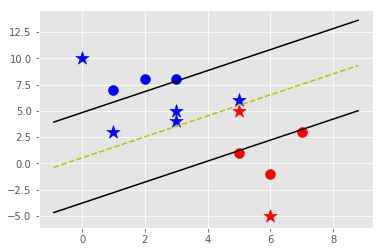

In [4]:
data = {-1:np.array([[1,7],[2,8],[3,8],]), 1:np.array([[5,1],[6,-1],[7,3],])}


w, b, minVal, maxVal = Train(data=data)

test = [[0,10],[1,3],[3,4],[3,5],[5,5],[5,6],[6,-5],[5,8]]

Cl = []
for t in test:
    cl = Predict(t, w, b)
    Cl.append(cl)

Show(data, test, Cl, w, b, minVal, maxVal)


## Credits & Links

https://www.kdnuggets.com/2017/08/support-vector-machines-learning-svms-examples.html/2  
https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47